In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import gwsurrogate

/Users/spx8sk/anaconda3/envs/wispy-dev/lib/python3.7/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/Users/spx8sk/anaconda3/envs/wispy-dev/lib/python3.7/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


In [2]:
matplotlib.rcParams.update({'font.size': 16})

In [3]:
sur = gwsurrogate.LoadSurrogate('/Users/spx8sk/work/data/NRHybSur3dq8.h5')

/Users/spx8sk/anaconda3/envs/wispy-dev/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


Loaded NRHybSur3dq8 model


# loop over 3,2 mode

In [4]:
q_list = np.arange(1, 8, 0.2)

In [5]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [15]:
hs={}
for q in q_list:
    q = float("{:.4f}".format(q))
    chiA = [0, 0, 0.]
    chiB = [0, 0, 0.]
    dt = 0.1        # step size, Units of M
    f_low = 5e-3    # initial frequency, Units of cycles/M
    t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low*3)        # dyn stands for dynamics and is always None for this model
    
    phase = np.unwrap(np.angle(h[(3,2)]))
    freq = IUS(t, phase).derivative()(t)
    
    
    hs.update({q:{'t':t,'h':h, 'f':freq}})

    

In [16]:
hs.keys()

dict_keys([1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4, 5.6, 5.8, 6.0, 6.2, 6.4, 6.6, 6.8, 7.0, 7.2, 7.4, 7.6, 7.8])

In [21]:
hs[1.0]['t']

array([-191.4, -191.3, -191.2, ...,  134.7,  134.8,  134.9])

In [22]:
np.real(hs[1.0]['h'][(3,2)])

array([ 2.05866937e-03,  2.06044826e-03,  2.06204578e-03, ...,
       -3.66050268e-06, -3.59146059e-06, -3.49571303e-06])

In [23]:
np.imag(hs[1.0]['h'][(3,2)])

array([ 1.41778385e-04,  1.22470580e-04,  1.03136482e-04, ...,
       -1.30277096e-06, -1.27182513e-06, -1.24925801e-06])

In [30]:
np.array(list(zip(hs[1.0]['t'], np.real(hs[1.0]['h'][(3,2)]), np.imag(hs[1.0]['h'][(3,2)]))))

array([[-1.91400000e+02,  2.05866937e-03,  1.41778385e-04],
       [-1.91300000e+02,  2.06044826e-03,  1.22470580e-04],
       [-1.91200000e+02,  2.06204578e-03,  1.03136482e-04],
       ...,
       [ 1.34700000e+02, -3.66050268e-06, -1.30277096e-06],
       [ 1.34800000e+02, -3.59146059e-06, -1.27182513e-06],
       [ 1.34900000e+02, -3.49571303e-06, -1.24925801e-06]])

In [51]:


# import h5py

# outdir = 'data'
# import os
# os.makedirs(outdir)

# for k in list(hs.keys()):
#     times = hs[k]['t']
#     hreal = np.real(hs[k]['h'][(3,2)])
#     himag = np.imag(hs[k]['h'][(3,2)])
#     data = np.array(list(zip(times, hreal, himag)))
#     h5f = h5py.File(outdir + '/NRSur3dq8_q{}.h5'.format(k), 'w')
    
#     h5f.attrs['q'] = float(k)
    
#     h5f.create_dataset('data', data=data)
#     h5f.close()

(-10, 40)

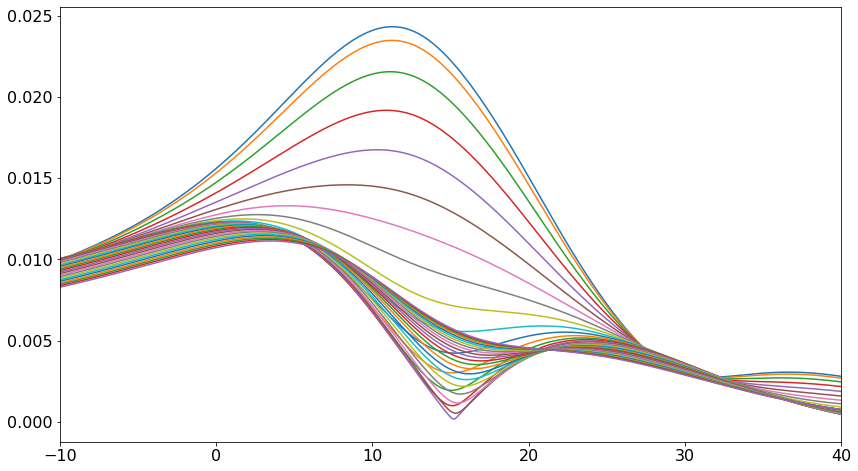

In [17]:
plt.figure(figsize=(14,8))
for k in hs.keys():
    plt.plot(hs[k]['t'], np.abs(hs[k]['h'][(3,2)]), label=str("{:.2f}".format(k)))
plt.xlim(-10,40)
# plt.yscale('log')
# plt.legend()

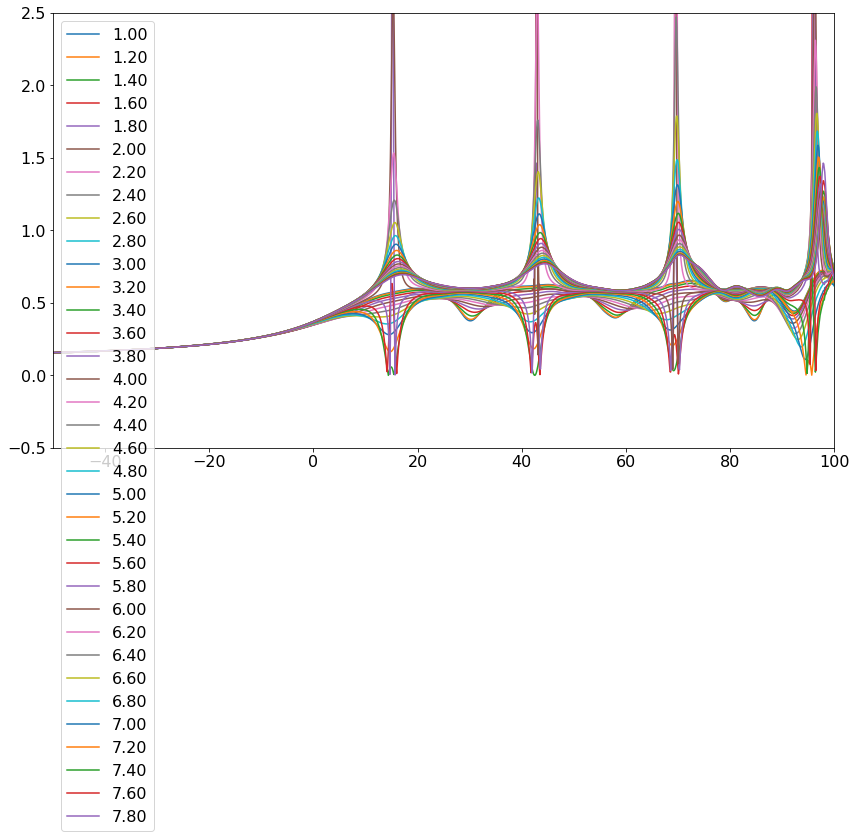

In [9]:
plt.figure(figsize=(14,8))
for k in hs.keys():
    plt.plot(hs[k]['t'], np.abs(hs[k]['f']), label=str("{:.2f}".format(k)))
plt.xlim(-50,100)
plt.ylim(-0.5,2.5)
# plt.yscale('log')
plt.legend(loc='upper left')